# Simple Two-Layer Neural Network for MNIST Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

##### Load MNIST dataset

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

#### Display sample images

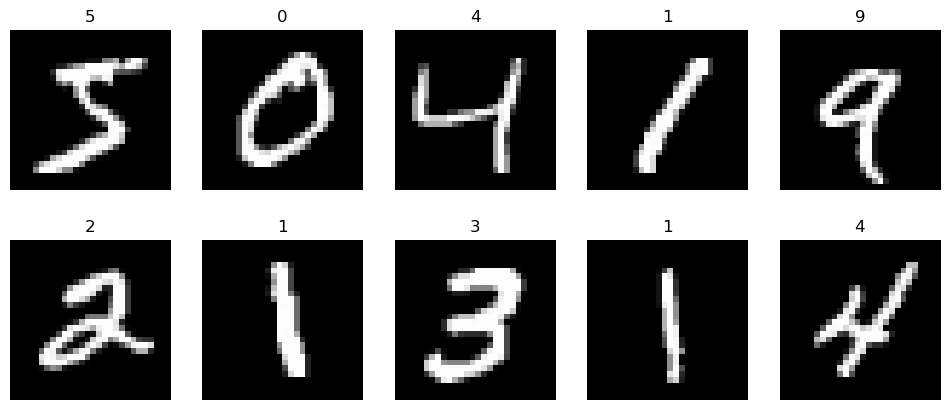

In [3]:
def display_samples(X, y, num_samples=10):
    fig, ax = plt.subplots(2, 5, figsize=(12, 5))
    ax = ax.flatten()
    for i in range(num_samples):
        ax[i].imshow(X[i], cmap='gray')
        ax[i].set_title(y[i])
        ax[i].axis('off')
    plt.show()
display_samples(X_train, y_train)

In [4]:
def one_hot_encode(y, num_classes):
    return np.squeeze(np.eye(num_classes)[y.reshape(-1)])

In [5]:
# Prepare training and testing datasets
X_train = X_train.reshape(60000, 784).T / 255.0
y_train = one_hot_encode(y_train, 10).T
X_test = X_test.reshape(10000, 784).T / 255.0
y_test = one_hot_encode(y_test, 10).T

##### Initialize parameters

In [6]:
def initialize_parameters():
    np.random.seed(101)
    W1 = np.random.randn(10, 784) * 0.01
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

##### Activation functions

In [7]:
def relu(z):
    return np.maximum(0, z)

In [8]:
def relu_derivative(A):
    return (A > 0).astype(float)

In [9]:
def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

##### Forward propagation

In [10]:
def forward_propagation(X, params):
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    
    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    return cache, A2

##### Backward propagation

In [11]:
def backward_propagation(X, y, params, cache):
    W1, W2 = params['W1'], params['W2']
    A1, A2 = cache['A1'], cache['A2']
    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2) * relu_derivative(A1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}

##### Update parameters

In [12]:

def update_parameters(params, gradients, learning_rate):
    params['W1'] -= learning_rate * gradients['dW1']
    params['b1'] -= learning_rate * gradients['db1']
    params['W2'] -= learning_rate * gradients['dW2']
    params['b2'] -= learning_rate * gradients['db2']
    return params

##### Neural network model

In [13]:

def nn_2_layer(X, y, iterations, learning_rate):
    params = initialize_parameters()
    for i in range(iterations):
        cache, A2 = forward_propagation(X, params)
        cost = -np.mean(y * np.log(A2 + 1e-8))
        accuracy = np.mean(np.argmax(A2, axis=0) == np.argmax(y, axis=0)) * 100

        gradients = backward_propagation(X, y, params, cache)
        params = update_parameters(params, gradients, learning_rate)

        if i % 10 == 0:
            print(f"Cost after iteration {i}: {cost:.6f} | Accuracy: {accuracy:.2f}%")
    return params

In [14]:
# Train the model
trained_params = nn_2_layer(X_train, y_train, iterations=201, learning_rate=0.3)

Cost after iteration 0: 0.230267 | Accuracy: 9.28%
Cost after iteration 10: 0.229518 | Accuracy: 12.83%
Cost after iteration 20: 0.223094 | Accuracy: 31.83%
Cost after iteration 30: 0.185379 | Accuracy: 52.04%
Cost after iteration 40: 0.123359 | Accuracy: 67.94%
Cost after iteration 50: 0.089636 | Accuracy: 76.24%
Cost after iteration 60: 0.071945 | Accuracy: 81.13%
Cost after iteration 70: 0.061373 | Accuracy: 83.74%
Cost after iteration 80: 0.056556 | Accuracy: 83.74%
Cost after iteration 90: 0.056280 | Accuracy: 81.99%
Cost after iteration 100: 0.047166 | Accuracy: 86.86%
Cost after iteration 110: 0.044446 | Accuracy: 87.67%
Cost after iteration 120: 0.042518 | Accuracy: 88.22%
Cost after iteration 130: 0.041001 | Accuracy: 88.57%
Cost after iteration 140: 0.039766 | Accuracy: 88.89%
Cost after iteration 150: 0.038738 | Accuracy: 89.13%
Cost after iteration 160: 0.037867 | Accuracy: 89.40%
Cost after iteration 170: 0.037117 | Accuracy: 89.60%
Cost after iteration 180: 0.036461 | Acc

In [15]:
# Evaluate accuracy on test data
def calculate_accuracy(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred) * 100
    print(f'Accuracy: {accuracy:.2f}%')

cache, A2 = forward_propagation(X_test, trained_params)
y_pred = np.argmax(A2, axis=0)
y_test_labels = np.argmax(y_test, axis=0)
calculate_accuracy(y_test_labels, y_pred)

Accuracy: 90.16%


In [16]:
# Visualize a single prediction
def visualize_prediction(img, prediction):
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Prediction: {prediction}")
    plt.show()

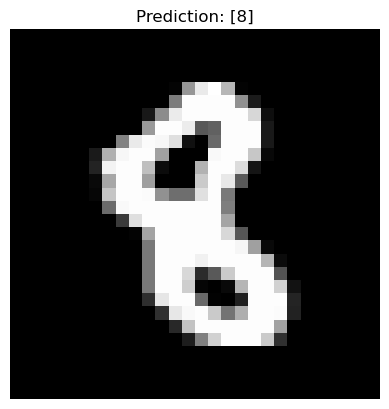

In [23]:
# Test a single prediction
sample_img = X_test[:, 9126]
cache, A2 = forward_propagation(sample_img.reshape(-1, 1), trained_params)
predicted_label = np.argmax(A2, axis=0)
visualize_prediction(sample_img, predicted_label)